## Assignment A3. Pitch and Rhythm

The goal of this assignment is the exploration of classic algorithms (e.g. autocorrelation, DFT-based) to extract fundamental information from musical signals:
- Pitch (in monophonic signals)
- Beats and Tempo;

In [103]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

In [135]:
x, sr = librosa.load('oboe.wav')
ipd.Audio(x, rate=sr)

In [136]:
print(sr)

22050


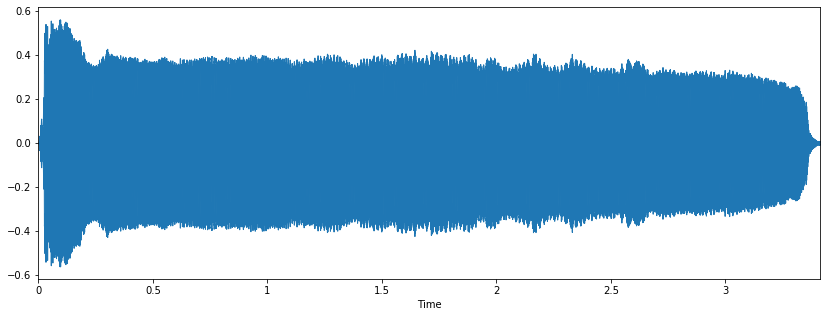

In [137]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr)

In [107]:
x2, sr2 = librosa.load('organ.wav')
ipd.Audio(x2, rate=sr2)

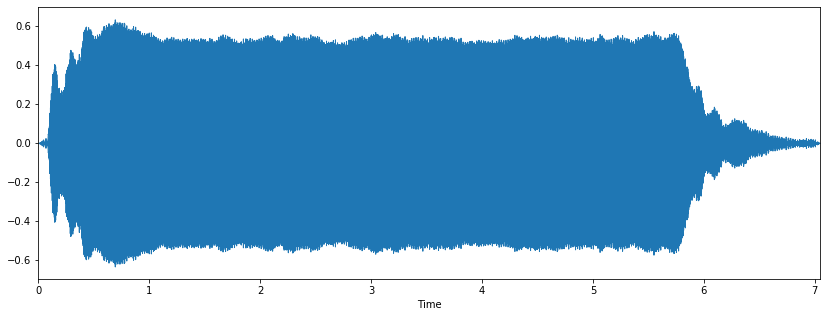

In [108]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x2, sr2)

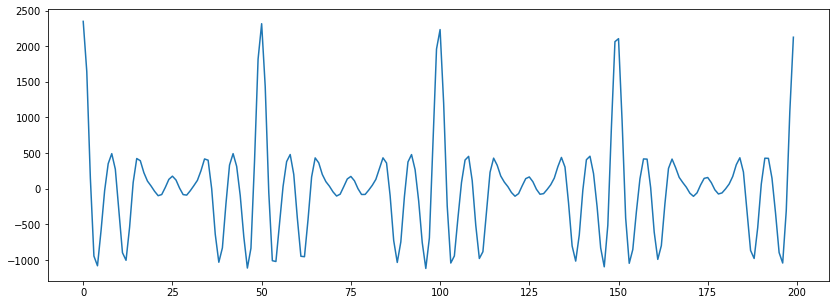

In [109]:
r = librosa.autocorrelate(x, max_size=5000)
plt.figure(figsize=(14, 5))
plt.plot(r[:200])

## Oboe

The autocorrelation always has a maximum at zero, i.e. zero lag. We want to identify the maximum outside of the peak centered at zero. Therefore, we might choose only to search within a range of reasonable pitches:

In [110]:
midi_hi = 120.0
midi_lo = 12.0
f_hi = librosa.midi_to_hz(midi_hi)
f_lo = librosa.midi_to_hz(midi_lo)
t_lo = sr/f_hi
t_hi = sr/f_lo

In [111]:
print(f_lo, f_hi)
print(t_lo, t_hi)

16.351597831287414 8372.018089619156
2.633773573344376 1348.4920695523206


Set invalid pitch candidates to zero:

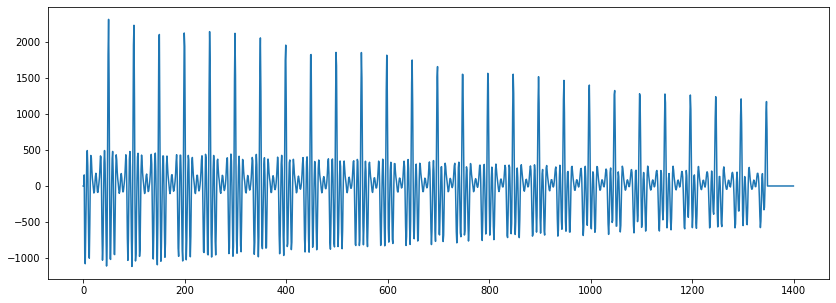

In [112]:
r[:int(t_lo)] = 0
r[int(t_hi):] = 0
plt.figure(figsize=(14, 5))
plt.plot(r[:1400])

Find the location of the maximum:

In [113]:
t_max = r.argmax()
print(t_max)

50


Finally, estimate the pitch in Hertz:

In [114]:
float(sr)/t_max

441.0

Value coresponds to A4 (69), source: https://musicinformationretrieval.com/midi_conversion_table.html

In [115]:
librosa.midi_to_hz(69)

440.0

## Organ

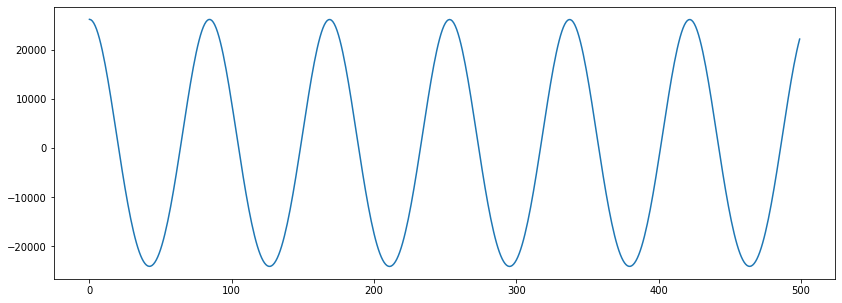

In [116]:
r2 = librosa.autocorrelate(x2, max_size=5000)
plt.figure(figsize=(14, 5))
plt.plot(r2[:500])

In [117]:
print(r2)

[26296.236   26213.191   25964.986   ...  -408.46164 -2242.559
 -4049.1738 ]


In [118]:
midi_hi = 120.0
midi_lo = 12.0
f_hi = librosa.midi_to_hz(midi_hi)
f_lo = librosa.midi_to_hz(midi_lo)
t_lo = sr2/f_hi
t_hi = sr2/f_lo

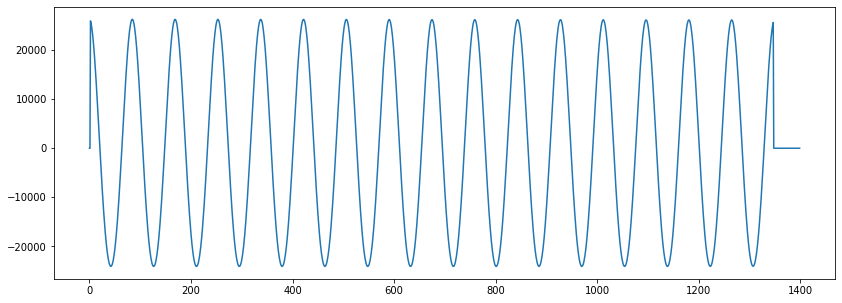

In [119]:
r2[:int(t_lo)] = 0
r2[int(t_hi):] = 0
plt.figure(figsize=(14, 5))
plt.plot(r2[:1400])

In [120]:
t_max2 = r2.argmax()
print(t_max)

50


In [121]:
pitch = float(sr)/t_max2

In [122]:
midi_rep = librosa.hz_to_midi(pitch)

In [123]:
note = librosa.midi_to_note(midi_rep)
print(note)

C4


Value coresponds to C4 (60), source: https://musicinformationretrieval.com/midi_conversion_table.html

In [124]:
librosa.midi_to_hz(60)

261.6255653005986

### Is this value correct or incorrect?
To verify the results, we opened to sonic visuliser and we analyzed the files. Here are results:
#### Oboe
![Chromagram of oboe](oboe_chrom.PNG "Oboe")
Chromagram for oboe shows notes A + A# which corresponds with computed notes.

#### Organ
![Chromagram of organ](organ_chrom.PNG "Organ")
Chromagram for oboe shows notes B+C+C# which also corresponds with computed notes.

### Global Analysis
On the previous task, your pitch estimates were frame-based. For the same signals, extend this frame analysis to the full sound, and for each sound:
 1. obtain a plot of the pitch estimation; on the x-axis you’ll have the frame number, on the y-axis the pitch/f0 in Hz.
 2. obtain a plot of the pitch estimation; on the x-axis you’ll have the frame number, on the y-axis the pitch/f0 in MIDI Note (ex. A0, B0, B1)
 3. Is any of these representations ( 1) or 2) ) a chromagram? Explain your answer.

In [133]:
def pitch_detection_in_frames(x, frame_length=2048, hop_length=512):
    frames = librosa.util.frame(x, frame_length=frame_length, hop_length=hop_length); #2048
    total_frames, num_of_values_in_frame = frames.shape;
    pitch_arr_hz = []
    pitch_arr_midi = []
    for i in range(total_frames):
        pitch_max = frames[i].argmax() # counting the pitch for each frame
        if (pitch_max == 0):
            pitch_arr_hz.append(0)
            pitch_arr_midi.append(0)
        else:
            pitch_hz = float(sr)/pitch_max
            pitch_arr_hz.append(pitch_hz) # creating the array with pitches
            midi_rep = librosa.hz_to_midi(pitch_hz)
            pitch_arr_midi.append(midi_rep)

    plt.figure(figsize=(14, 5))
    plt.plot(pitch_arr)
    plt.figure(figsize=(14, 5))
    plt.plot(pitch_arr_midi)

#### Pitch detection for oboe

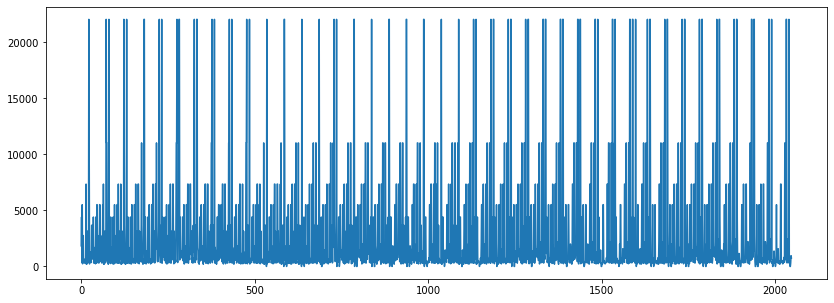

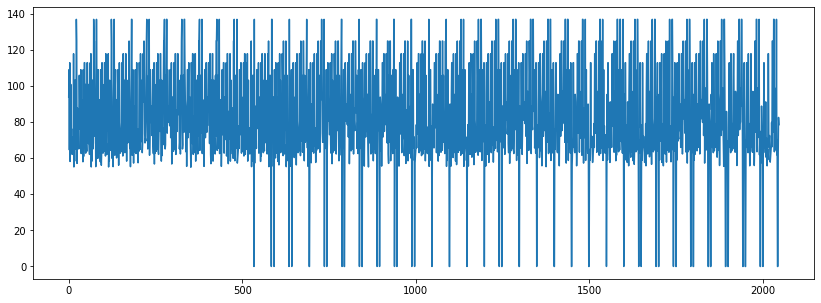

In [138]:
pitch_detection_in_frames(x) #@todo discuss frame + hop

#### Pitch detection for organ

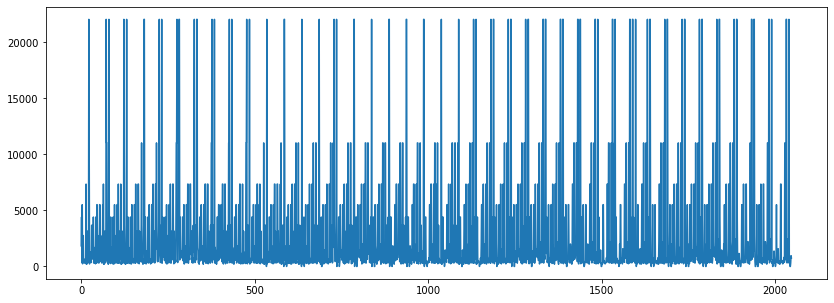

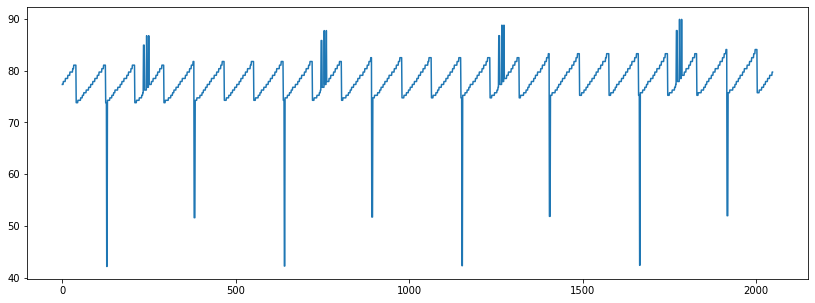

In [132]:
pitch_detection_in_frames(x2)